# 1. 문제 정의

### 광고 비용으로 매출을 예측해보자

### 지도학습 / 회귀

# 2. 데이터 수집

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../data/Advertising.csv', index_col=0)

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


# 3. 데이터 전처리

In [6]:
X = data.iloc[:,:3]
y = data.iloc[:,3]

In [7]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, Length: 200, dtype: float64

# 4. EDA

In [8]:
#!pip install seaborn

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

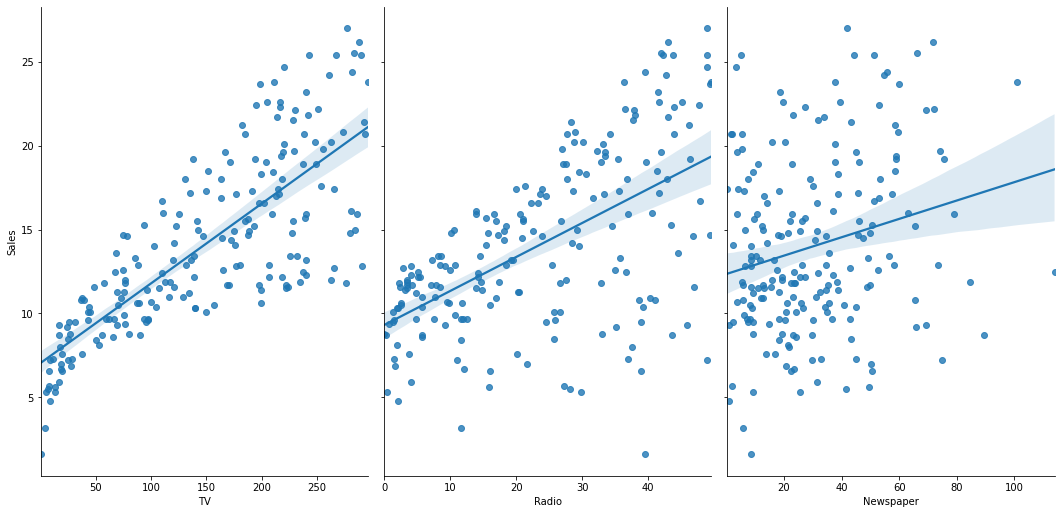

In [10]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', 
             height=7, aspect=0.7, kind='reg')

# 5. 모델 선택, 학습, 평가

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
# y = w1*x1 + w2*x2 + w3*x3 + b

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
print("계수: {}".format(model.coef_))
print("절편: {}".format(model.intercept_))

계수: [0.04391531 0.20027962 0.00184368]
절편: 2.880255286331323


# y = 0.044 * TV + 0.2 * Radio + 0.002 * Newspaper + 2.88

In [18]:
print("훈련 세트 점수: {}".format(model.score(X_train, y_train)))
print("테스트 세트 점수: {}".format(model.score(X_test, y_test)))

훈련 세트 점수: 0.9065727532450596
테스트 세트 점수: 0.8649018906637791


## - RMSE

In [19]:
y_pred = model.predict(X_test)

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [21]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.9213003007595166

# 가장 영향력이 없는 신문을 지워보자(살짝오름)

In [22]:
feature = ['TV', 'Radio']

In [23]:
X = data[feature]

In [24]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
print("훈련 세트 점수: {}".format(model.score(X_train, y_train)))
print("테스트 세트 점수: {}".format(model.score(X_test, y_test)))

훈련 세트 점수: 0.9065235649327258
테스트 세트 점수: 0.8656552691810044


In [27]:
y_pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

1.9159357179956473

# 더 향상 시킬수 있는 방법은?

In [28]:
data = pd.read_csv('../data/Advertising.csv', index_col=0)

In [29]:
X = data.iloc[:,:2].copy()#안하면 Warning
y = data.iloc[:,3].copy()

In [30]:
col = X.columns
for i in range(col.size):
    for j in range(i,col.size):
        X[col[i]+'x'+col[j]] = X[col[i]]*X[col[j]]

In [31]:
print(X.shape)
X.head()

(200, 5)


,TV,Radio,TVxTV,TVxRadio,RadioxRadio
1,230.1,37.8,52946.01,8697.78,1428.84
2,44.5,39.3,1980.25,1748.85,1544.49
3,17.2,45.9,295.84,789.48,2106.81
4,151.5,41.3,22952.25,6256.95,1705.69
5,180.8,10.8,32688.64,1952.64,116.64


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)
print("훈련 세트 점수: {}".format(model.score(X_train, y_train)))
print("테스트 세트 점수: {}".format(model.score(X_test, y_test)))

훈련 세트 점수: 0.9912495632936611
테스트 세트 점수: 0.9729857942978333


In [34]:
y_pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.85914549343126

# 스케일링(교재 3장 코드참조)
- StandardScaler : 평균을 0, 분산을 1로 변경하여 같은 크기를 가지게 됨
- RobustScaler : 중앙값과 사분위값을 사용하여 특성들이 같은 스케일을 갖게 됨(이상치에 영향받지않음)
- MinMaxScaler : 모든특성이 정확하게 0과 1사이에 위치
- Normalizer : 특성 벡터의 유클리디안 길이가 1이 되도록 조절

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [37]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
#from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

In [39]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(lr.score(X_test, y_test)))
y_pred = lr.predict(X_test)
print("RMSE 점수: {:.5f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

훈련 세트 점수: 0.98
테스트 세트 점수: 0.993
RMSE 점수: 0.41519


# 교차검증

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
model = Ridge()
result = cross_val_score(model, X_train, y_train, cv=5)
print(result)
print(result.mean())

[0.98666312 0.98008645 0.94078639 0.99121386 0.9855363 ]
0.9768572225488418


CAUTION_ 사이킷런의 교차 검증 기능은 scoring 매개변수에 (낮을수록 좋은) 비용 함수가 아니라 (클수록 좋은) 효용 함수를 기대합니다. 그래서 평균 제곱 오차(MSE)의 반댓값(즉, 음숫값)을 계산하는 neg_mean_squared_error 함수를 사용합니다. 이런 이유로 앞선 코드에서 제곱근을 계산하기 전에 -scores로 부호를 바꿨습니다.50

In [42]:
alpha_list = [0.0000001,0.000001,0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for alpha in alpha_list:
    model = Ridge(alpha=alpha)
    result = cross_val_score(model, X_train, y_train, cv=5)
    print("alpha :",alpha,"\t점수 :",result.mean())

alpha : 1e-07 	점수 : 0.9788472140431654
alpha : 1e-06 	점수 : 0.9788472139789961
alpha : 1e-05 	점수 : 0.9788472133370185
alpha : 0.0001 	점수 : 0.9788472068888506
alpha : 0.001 	점수 : 0.9788471395696619
alpha : 0.01 	점수 : 0.9788461843064458
alpha : 0.1 	점수 : 0.9788100270411139
alpha : 1 	점수 : 0.9768572225488418
alpha : 10 	점수 : 0.9512067066090439
alpha : 100 	점수 : 0.8605310348028343
alpha : 1000 	점수 : 0.381084902532433


## MSE로 계산

In [43]:
alpha_list = [0.0000001,0.000001,0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for alpha in alpha_list:
    model = Ridge(alpha=alpha)
    result = cross_val_score(model, X_train, y_train, cv=5,
                             scoring="neg_mean_squared_error")
    print("alpha :",alpha,"\t점수 :",-result.mean())

alpha : 1e-07 	점수 : 0.5388542742980361
alpha : 1e-06 	점수 : 0.5388542692673566
alpha : 1e-05 	점수 : 0.5388542189686591
alpha : 0.0001 	점수 : 0.5388537167919119
alpha : 0.001 	점수 : 0.5388487759986833
alpha : 0.01 	점수 : 0.5388074172244617
alpha : 0.1 	점수 : 0.5391527194376957
alpha : 1 	점수 : 0.5879065136924053
alpha : 10 	점수 : 1.2673446369215977
alpha : 100 	점수 : 3.8158271410520177
alpha : 1000 	점수 : 17.17543705028521


In [44]:
alpha_list = [0.0000001,0.000001,0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
for alpha in alpha_list:
    model = Lasso(alpha=alpha)
    result = cross_val_score(model, X_train, y_train, cv=5
                            ,scoring="neg_mean_squared_error")
    print("alpha :",alpha,"\t점수 :",-result.mean())

alpha : 1e-07 	점수 : 0.5388541899504834
alpha : 1e-06 	점수 : 0.538853424120936
alpha : 1e-05 	점수 : 0.538845778857172
alpha : 0.0001 	점수 : 0.5387706589750686
alpha : 0.001 	점수 : 0.5385916457967282
alpha : 0.01 	점수 : 0.5467604196704355
alpha : 0.1 	점수 : 1.1765888338501351
alpha : 1 	점수 : 2.3583960731503932
alpha : 10 	점수 : 28.036548788265304
alpha : 100 	점수 : 28.036548788265304
alpha : 1000 	점수 : 28.036548788265304
alpha : 10000 	점수 : 28.036548788265304


In [45]:
"""교차검증 scoreing 넣을수있는 데이터"""
from sklearn.metrics import SCORERS        
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])